In [165]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [166]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder('dog_images/train')
valid_data = datasets.ImageFolder('dog_images/valid')
test_data = datasets.ImageFolder('dog_images/test')

trainloader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True, num_workers=0)

validloader = torch.utils.data.DataLoader(valid_data, batch_size=128, shuffle=True, num_workers=0)

testloader = torch.utils.data.DataLoader(test_data,  batch_size=64, shuffle=False, num_workers=0)

loaders_scratch = {'train' : trainloader, 'valid' : validloader, 'test' : testloader}

print(train_data)

print(valid_data)

print(test_data)

Dataset ImageFolder
    Number of datapoints: 6680
    Root location: dog_images/train
Dataset ImageFolder
    Number of datapoints: 835
    Root location: dog_images/valid
Dataset ImageFolder
    Number of datapoints: 836
    Root location: dog_images/test


In [193]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

train_basic_transforms = transforms.Compose([
                                       transforms.Resize(size=258),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                                      ])

train_variation_transforms = transforms.Compose([
                                       transforms.Resize(size=258),
                                       transforms.CenterCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
                                       transforms.RandomRotation(50),
                                       #transforms.FiveCrop(224),
                                       transforms.ToTensor(),
                                       #transforms.Lambda(lambda crops: torch.stack([ToTensor()(crop) for crop in crops])),
                                       transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                                      ])

# Pass transforms in here, then run the next cell to see how the transforms look

train_data = datasets.ImageFolder('dog_images/train', transform=train_basic_transforms)
transformed_train_data = datasets.ImageFolder('dog_images/train', transform=train_variation_transforms)

augmented_train_data = torch.utils.data.ConcatDataset([train_data,transformed_train_data])

print(len(augmented_train_data))

trainloader = torch.utils.data.DataLoader(augmented_train_data, batch_size=8)


13360


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


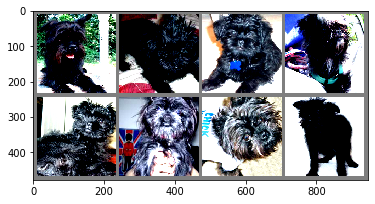

In [194]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img):
    img = img / 2 + 0.5    
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
def tensorshow(batch, n=5):
    for  i in range(n):
        npimg = batch[i].numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.show()

        
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, nrow=4, padding = 10))
#tensorshow()


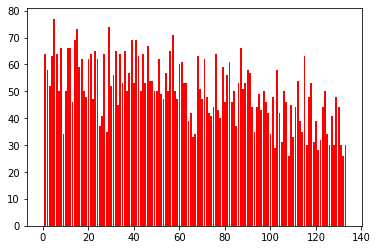

77 dog_images/train\005.Alaskan_malamute
26 dog_images/train\108.Norwegian_buhund
[64, 58, 52, 63, 77, 64, 50, 66, 34, 50, 66, 66, 46, 69, 73, 59, 62, 50, 48, 62, 64, 47, 65, 62, 37, 41, 64, 35, 74, 52, 56, 65, 45, 64, 53, 65, 50, 57, 69, 53, 69, 63, 50, 64, 53, 67, 54, 54, 50, 50, 62, 49, 47, 57, 50, 65, 71, 50, 47, 60, 61, 53, 53, 39, 42, 33, 34, 63, 51, 47, 62, 48, 42, 41, 44, 64, 43, 40, 59, 46, 56, 61, 46, 50, 37, 53, 66, 51, 53, 58, 57, 44, 35, 44, 49, 43, 50, 46, 42, 34, 48, 29, 58, 42, 31, 50, 46, 26, 45, 33, 44, 54, 39, 35, 63, 30, 48, 53, 31, 39, 28, 32, 44, 50, 34, 30, 41, 30, 48, 44, 30, 26, 30]


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

base_dir = "dog_images/train"
distribution = {}
number_list = []
max_class = 0
max_path = ''
min_class = 100
min_path = ''
for dirpath, dirnames, filenames in os.walk(base_dir):
    distribution[dirpath] = 0
    for filename in [f for f in filenames]: 
        distribution[dirpath] += 1
    if distribution[dirpath] != 0:
        number_list.append(distribution[dirpath])
        if distribution[dirpath] > max_class:
            max_class = distribution[dirpath]
            max_path = dirpath
        if distribution[dirpath] < min_class:
            min_class = distribution[dirpath]
            min_path = dirpath
        
keys, values = distribution.keys(), distribution.values()
plt.bar(range(len(values)), values, color='r')
plt.show()

print(max(number_list), max_path)

print(min(number_list), min_path)
print(number_list)


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

base_dir = "dog_images/test"
sizes = []    
widths = []
heights = []
for dirpath, dirnames, filenames in os.walk(base_dir):
    for dirname in [d for d in dirnames]: 
        files = os.listdir(base_dir + "/" + dirname)   
        for file in files:
            im = Image.open(base_dir + "/" + dirname + "/" + file)
            width, height = im.size
            sizes.append(im.size)   
            widths.append(width)
            heights.append(height)
            
print(sizes)
print(max(widths))
print(max(heights))
print(min(widths))
print(min(heights))

[(314, 320), (406, 450), (300, 380), (500, 500), (375, 500), (500, 375), (264, 279), (640, 480), (484, 500), (400, 341), (450, 600), (800, 534), (626, 802), (800, 600), (270, 377), (600, 535), (358, 432), (600, 450), (200, 250), (600, 800), (450, 600), (426, 640), (640, 591), (346, 551), (470, 370), (800, 500), (250, 374), (636, 424), (800, 531), (524, 750), (334, 500), (235, 352), (1208, 1595), (400, 315), (400, 340), (300, 470), (600, 480), (499, 479), (650, 432), (2040, 1216), (550, 490), (355, 372), (1024, 768), (360, 291), (800, 827), (441, 500), (3264, 2448), (640, 480), (640, 480), (638, 427), (639, 425), (200, 153), (426, 639), (250, 250), (379, 638), (512, 736), (329, 400), (300, 242), (590, 380), (300, 450), (303, 360), (800, 1235), (300, 398), (300, 229), (300, 451), (297, 300), (640, 480), (250, 250), (262, 350), (320, 298), (270, 511), (360, 327), (635, 425), (1280, 960), (300, 321), (660, 599), (943, 693), (239, 233), (496, 372), (350, 343), (900, 1022), (300, 409), (1048